In [1]:
import os
os.getcwd()

'F:\\Machine-learning\\Assignments'

In [2]:
os.chdir('F:\\Machine-learning\\Assignments\\data_set')
os.getcwd()

'F:\\Machine-learning\\Assignments\\data_set'

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df = df.rename({"DEATH_EVENT":"death"}, axis=1)  #rename target column name

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.to_csv('After_Change_Column_Name_heart failure.csv')  #save modified dataframe

In [8]:
df.death.value_counts()  #count each classes, 0 = not death, 1 = death

0    203
1     96
Name: death, dtype: int64

# data visualization

<AxesSubplot:xlabel='death', ylabel='count'>

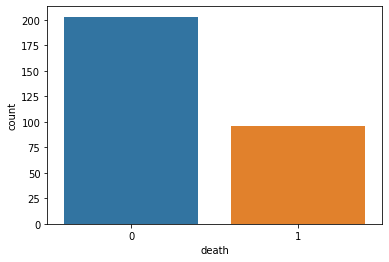

In [9]:
import seaborn as sns

sns.countplot(x="death", data=df)  # for x axis graph respected to death attribute

<AxesSubplot:xlabel='count', ylabel='death'>

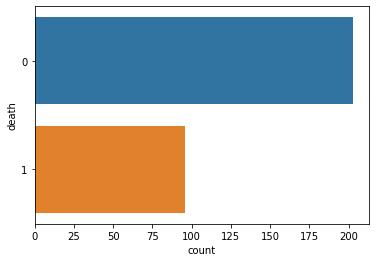

In [10]:
sns.countplot(y="death", data=df) # for y axis graph respected to death attribute

<AxesSubplot:xlabel='diabetes', ylabel='count'>

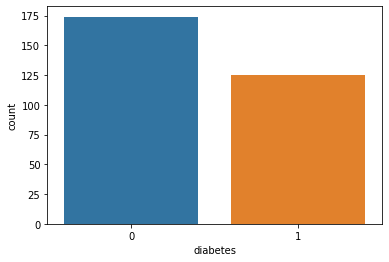

In [11]:
sns.countplot(x="diabetes", data=df)  # for x axis graph respected to diabetes attribute

### death analysis with respect to diabetes

<AxesSubplot:xlabel='diabetes', ylabel='count'>

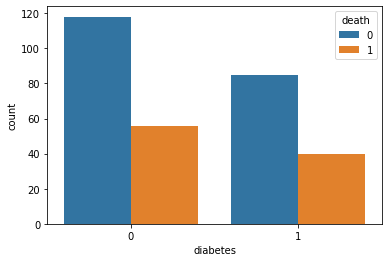

In [12]:
sns.countplot(x="diabetes", data=df, hue="death")

In [13]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

### death analysis with respect to anaemia

<AxesSubplot:xlabel='anaemia', ylabel='count'>

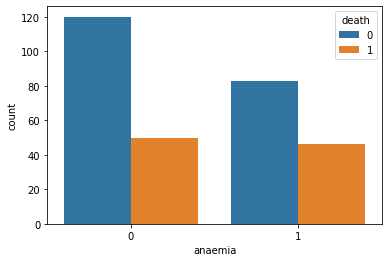

In [14]:
sns.countplot(x="anaemia", data=df, hue="death")

In [15]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

### death analysis with respect to high_blood_pressure

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

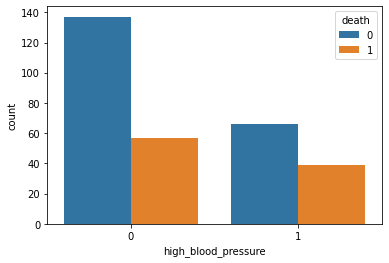

In [16]:
sns.countplot(x="high_blood_pressure", data=df, hue="death")

### diabetes analysis with respect to anaemia

<AxesSubplot:xlabel='anaemia', ylabel='count'>

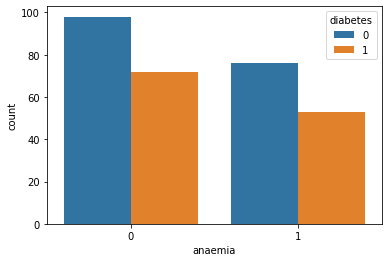

In [17]:
sns.countplot(x="anaemia", data=df, hue="diabetes")

In [18]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

### split data into x (independent variable)  and  y (dependent variable/ target column)

In [19]:
x = df.drop("death", axis=1)

In [20]:
y = df["death"]

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: death, dtype: int64

In [22]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


### split data according to training and testing data_set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70, random_state=42)

In [28]:
print(f"xtrain: {xtrain.shape}, xtest: {xtest.shape} \nytrain: {ytrain.shape},  ytest: {ytest.shape}")

xtrain: (209, 12), xtest: (90, 12) 
ytrain: (209,),  ytest: (90,)


### Apply dicision tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [30]:
dt.fit(xtrain, ytrain)  # train the model with 70% of data

DecisionTreeClassifier()

In [31]:
pred = dt.predict(xtest)  # pred is corresponding to ytest

In [32]:
pred   # predicted value of y for xtest

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [33]:
import numpy as np             # for converting dataframe into array
np.array(ytest)   # actual value of y for xtest

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)